Описания полей датасета по недвижимости

Id - идентификационный номер квартиры,

DistrictId - идентификационный номер района,

Rooms - количество комнат,

Square - площадь,

LifeSquare - жилая площадь,

KitchenSquare - площадь кухни,

Floor - этаж,

HouseFloor - количество этажей в доме,

HouseYear - год постройки дома,

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности,

Social_1, Social_2, Social_3 - социальные показатели местности,

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья,

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров,

Price - цена квартиры.

**Импортируем нужные нам модули**

In [918]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

Загрузим данные из файла для обработки

In [919]:
df = pd.read_csv('train.csv')

Ознакомимся с данными

In [920]:
df.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

Посмотрим количество строк и столбцов

In [921]:
df.shape

(10000, 20)

Посмотрим информацию о столбцах, количестве непустых значений и типах данных

In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Изучим отдельно имена столбцов

In [923]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

Ознакомимся с уникальными значениями некоторых столбцов для выявления аномалий

In [924]:
df['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [925]:
df[df['HouseYear'] == 20052011].head()

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109    1.0  37.26507   20.239714            9.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497        12.0   20052011    0.13633         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
1497      6141        10         262.0            3        6       B   

              Price  
1497  254084.534396

Поменяем значение 20052011 в столбце 'HouseYear' на 2011. Предполагаем, что это число подразумевает дату 20.05.2011. Обратно дата записана быть не может, т.к. не может быть 11.20.2005.

In [926]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [927]:
df.loc[1497]

Id                       10814
DistrictId                 109
Rooms                      1.0
Square                37.26507
LifeSquare           20.239714
KitchenSquare              9.0
Floor                        9
HouseFloor                12.0
HouseYear                 2011
Ecology_1              0.13633
Ecology_2                    B
Ecology_3                    B
Social_1                    30
Social_2                  6141
Social_3                    10
Healthcare_1             262.0
Helthcare_2                  3
Shops_1                      6
Shops_2                      B
Price            254084.534396
Name: 1497, dtype: object

In [928]:
df[df['HouseYear'] == 4968].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4189  11607         147    2.0  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4189         9.0       4968   0.319809         B         B        25   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
4189      4756        16        2857.0            5        8       B   

              Price  
4189  243028.603096

Заменим опечатку в году 4968, поменяем на 1968

In [929]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [930]:
df.loc[4189]

Id                       11607
DistrictId                 147
Rooms                      2.0
Square               44.791836
LifeSquare           28.360393
KitchenSquare              5.0
Floor                        4
HouseFloor                 9.0
HouseYear                 1968
Ecology_1             0.319809
Ecology_2                    B
Ecology_3                    B
Social_1                    25
Social_2                  4756
Social_3                    16
Healthcare_1            2857.0
Helthcare_2                  5
Shops_1                      8
Shops_2                      B
Price            243028.603096
Name: 4189, dtype: object

In [931]:
df['HouseYear'].unique()

array([1969, 1978, 1968, 1977, 1976, 2011, 1960, 2014, 1973, 1959, 1999,
       1980, 1979, 1983, 2001, 2012, 2002, 1996, 1964, 2018, 1972, 1965,
       1984, 1961, 1971, 1963, 2017, 1970, 1981, 2003, 2016, 1991, 1975,
       2006, 2009, 1985, 1974, 1994, 2000, 1987, 1998, 2005, 1990, 1982,
       1997, 2015, 2008, 2010, 2004, 2007, 1967, 1957, 1962, 1993, 1966,
       1955, 1937, 1992, 1954, 1995, 2019, 1948, 1986, 2013, 1989, 1958,
       1938, 1956, 1988, 2020, 1951, 1952, 1935, 1914, 1932, 1950, 1917,
       1918, 1940, 1942, 1939, 1934, 1931, 1919, 1912, 1953, 1936, 1947,
       1929, 1930, 1933, 1941, 1916, 1910, 1928])

Посмотрим информацию по количеству непустых данных и типам данных

In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Посмотрим статистические данные

In [933]:
df.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        6.273300      8.526700     12.609400   1984.866300      0.118858   
std        28.560917      5.241148      6.775974     18.412271      0.119025   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.017647   
50%         6.000000      7.000000     13.000000   1977.000000      0.075424   
75%         9.000000     12.000000     17.000000   2001.000000      0.195781   
max      2014.000000     42.000000    117.000000   2020.000000      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

Проверим наличие дубликатов

In [934]:
dupl = df[df.duplicated()].shape[0]
dupl

0

Посмотрим корреляцию

In [935]:
df.corr()

Id  DistrictId     Rooms    Square  LifeSquare  \
Id             1.000000    0.012973 -0.005847 -0.010071    0.018449   
DistrictId     0.012973    1.000000  0.071432 -0.026613   -0.019910   
Rooms         -0.005847    0.071432  1.000000  0.662893    0.131336   
Square        -0.010071   -0.026613  0.662893  1.000000    0.196129   
LifeSquare     0.018449   -0.019910  0.131336  0.196129    1.000000   
KitchenSquare  0.019880    0.040358  0.005123  0.008320   -0.001195   
Floor          0.001348   -0.120373 -0.000665  0.114791    0.024559   
HouseFloor    -0.008376   -0.149051 -0.029302  0.081505    0.027442   
HouseYear      0.003479   -0.201029 -0.038804  0.179727    0.058005   
Ecology_1      0.018097    0.065294 -0.032347 -0.064479   -0.023629   
Social_1      -0.000772    0.246463  0.075980 -0.070690   -0.048363   
Social_2      -0.002033    0.167479  0.071335 -0.043120   -0.039283   
Social_3      -0.009358    0.136095  0.012811  0.035241    0.012763   
Healthcare_1  -0.003879    0.304335  0.042857 -0.039748   -0.026867   
Helthcare_2    0.001502    0.306147  0.063557 -0.022960   -0.024762   
Shops_1       -0.008718    0.174214  0.053618  0.021357   -0.007569   
Price          0.009880    0.265100  0.550291  0.520075    0.081292   

               KitchenSquare     Floor  HouseFloor  HouseYear  Ecology_1  \
Id                  0.019880  0.001348   -0.008376   0.003479   0.018097   
DistrictId          0.040358 -0.120373   -0.149051  -0.201029   0.065294   
Rooms               0.005123 -0.000665   -0.029302  -0.038804  -0.032347   
Square              0.008320  0.114791    0.081505   0.179727  -0.064479   
LifeSquare         -0.001195  0.024559    0.027442   0.058005  -0.023629   
KitchenSquare       1.000000 -0.011397    0.000780   0.038540  -0.005622   
Floor              -0.011397  1.000000    0.418986   0.284482  -0.016133   
HouseFloor          0.000780  0.418986    1.000000   0.392979  -0.004362   
HouseYear           0.038540  0.284482    0.392979   1.000000  -0.066485   
Ecology_1          -0.005622 -0.016133   -0.004362  -0.066485   1.000000   
Social_1            0.043379 -0.044914   -0.020801  -0.047901   0.026464   
Social_2            0.037805 -0.016560    0.007194   0.013664   0.009264   
Social_3           -0.015140 -0.002237   -0.008137  -0.049383  -0.124068   
Healthcare_1        0.009472 -0.138294   -0.143973  -0.205527  -0.043547   
Helthcare_2         0.043170 -0.065537   -0.068728  -0.116329   0.030873   
Shops_1             0.010216  0.024264    0.026279  -0.002132  -0.076749   
Price               0.028864  0.128715    0.088280   0.036634  -0.058381   

               Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  \
Id            -0.000772 -0.002033 -0.009358     -0.003879     0.001502   
DistrictId     0.246463  0.167479  0.136095      0.304335     0.306147   
Rooms          0.075980  0.071335  0.012811      0.042857     0.063557   
Square        -0.070690 -0.043120  0.035241     -0.039748    -0.022960   
LifeSquare    -0.048363 -0.039283  0.012763     -0.026867    -0.024762   
KitchenSquare  0.043379  0.037805 -0.015140      0.009472     0.043170   
Floor         -0.044914 -0.016560 -0.002237     -0.138294    -0.065537   
HouseFloor    -0.020801  0.007194 -0.008137     -0.143973    -0.068728   
HouseYear     -0.047901  0.013664 -0.049383     -0.205527    -0.116329   
Ecology_1      0.026464  0.009264 -0.124068     -0.043547     0.030873   
Social_1       1.000000  0.955988  0.023721      0.077133     0.524593   
Social_2       0.955988  1.000000  0.073379      0.050458     0.473193   
Social_3       0.023721  0.073379  1.000000      0.133877     0.286434   
Healthcare_1   0.077133  0.050458  0.133877      1.000000     0.203177   
Helthcare_2    0.524593  0.473193  0.286434      0.203177     1.000000   
Shops_1        0.526272  0.559163  0.662113      0.057758     0.474085   
Price          0.263286  0.239226  0.074878      0.138755     0.253090   

                Shops_1     Price  
Id  

Посмотрим корреляцию графически

In [936]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

<AxesSubplot:>

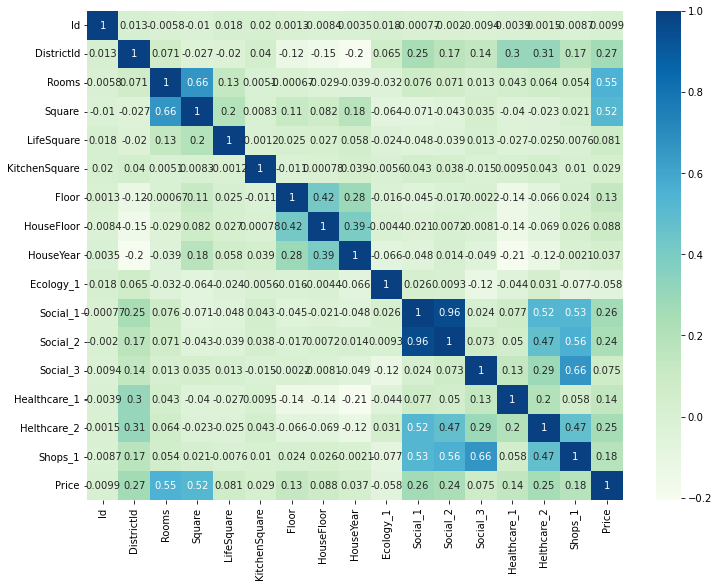

In [937]:
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')

Посмотрим подробно корреляцию social_1 и social_2

<AxesSubplot:>

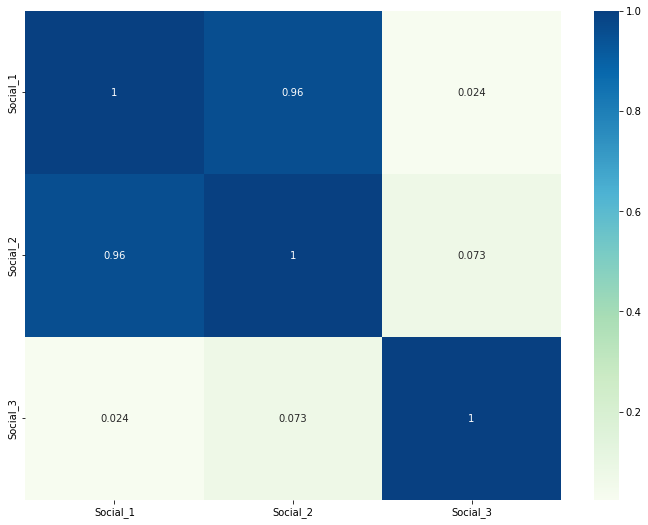

In [938]:
sns.heatmap(df.loc[:, 'Social_1':'Social_3'].corr(), annot = True, cmap = 'GnBu')

Видим, что social_1 и social_2 очень тесно скоррелированны, для целей обучения модели удалим столбец social_1

In [939]:
df.drop('Social_1', axis = 1, inplace = True)

In [940]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

Изучим данные по количеству комнат

In [941]:
df['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

Поменяем тип данных для Rooms

In [942]:
df['Rooms'] = df['Rooms'].astype(int)

In [943]:
df[df['Rooms'] > 5]['Rooms'].count()

4

In [944]:
df[df['Rooms'] > 5].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57     10  59.056975   36.223072           10.0     22   
1454   8491           1     19  42.006046   21.779288            7.0     17   
2170  14003          99      6  59.414334   38.702244            6.0      7   
8849  14865           9     10  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
377         22.0       2002   0.090799         B         B     19083   
1454        17.0       2014   0.007122         B         B       264   
2170         9.0       1969   0.033494         B         B     10573   
8849         2.0       1994   0.161532         B         B      5648   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
377          2           NaN            5       15       B  317265.323792  
1454         0           NaN            0        1       B   78364.616704  
2170         1        1322.0            3        8       B  229661.964416  
8849         1          30.0            2        4       B  172329.270863

Судя по составу этих данных есть ошибки в столбце rooms, остальные столбцы содержат вполне корректные данные. Скорректируем столбец rooms.

In [945]:
df.loc[df['Rooms'] == 19, 'Rooms'] = 1

In [946]:
df[df['Rooms'] > 5].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57     10  59.056975   36.223072           10.0     22   
2170  14003          99      6  59.414334   38.702244            6.0      7   
8849  14865           9     10  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
377         22.0       2002   0.090799         B         B     19083   
2170         9.0       1969   0.033494         B         B     10573   
8849         2.0       1994   0.161532         B         B      5648   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
377          2           NaN            5       15       B  317265.323792  
2170         1        1322.0            3        8       B  229661.964416  
8849         1          30.0            2        4       B  172329.270863

In [947]:
df.loc[df['Rooms'] > 5, 'Rooms'] = 2

In [948]:
df[df['Rooms'] < 1]['Rooms'].count()

8

In [949]:
df[df['Rooms'] < 1].head(8)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27      0  138.427694  136.215499            0.0      4   
1981   7917          27      0  212.932361  211.231125            0.0      2   
2269   7317          27      0   41.790881         NaN            0.0     13   
3911    770          28      0   49.483501         NaN            0.0     16   
4366    456           6      0   81.491446         NaN            0.0      4   
4853   3224          27      0    2.377248    0.873147            0.0      1   
6149   3159          88      0   38.697117   19.345131            9.0      9   
8834   9443          27      0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
1397         3.0       2016   0.075424         B         B      3097   
1981         3.0       2008   0.211401         B         B      1892   
2269         0.0       1977   0.211401         B         B      1892   
3911         0.0       2015   0.118537         B         B      6207   
4366         0.0       1977   0.243205         B         B      1564   
4853         0.0       1977   0.017647         B         B       469   
6149        16.0       1982   0.127376         B         B      8429   
8834        15.0       1977   0.211401         B         B      1892   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
1397         0           NaN            0        0       B  268394.744389  
1981         0           NaN            0        1       B  302211.260887  
2269         0           NaN            0        1       B   98129.976788  
3911         1        1183.0            1        0       B  217009.338463  
4366         0         540.0            0        0       B  212864.799112  
4853         0           NaN            0        0       B  126596.941798  
6149         3           NaN            3        9       B  158998.110646  
8834         0           NaN            0        1       B  219281.918007

Скорректируем данные по количеству комнат там, где они равны 0

In [950]:
def change_rooms(id, rooms):
    df.loc[df['Id'] == id, 'Rooms'] = rooms

In [951]:
changes_rooms = {12638:5, 7917:5, 7317:2, 770:1, 456:3, 3224:0, 3159:1, 9443:3}

In [952]:
for key in changes_rooms.keys():
    change_rooms(key, changes_rooms[key])

Для анализа данных введем дополнительный относительный показатель отношение площади объекта к количеству комнат

In [953]:
df['Square/Rooms'] = df['Square']/df['Rooms']

In [954]:
px.box(df, y = 'Square/Rooms')

In [955]:
np.quantile(df['Square/Rooms'], q = 0.975)

51.810990231791756

In [956]:
np.quantile(df['Square/Rooms'], q = 0.025)

19.13204876646092

Посмотрим данные, в которых на одну комнату квартиры приходится более 150 м кв.

In [957]:
df[df['Square/Rooms']>150]['Rooms'].count()

8

In [958]:
df[df['Square/Rooms']>150].head(8)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1641  11055         151      1  174.649522  174.837082           15.0     10   
3260  16204          23      1  160.647588         NaN            1.0      3   
3368   6674          54      1  168.086347  125.486563           30.0     18   
4047  15362          23      1  163.286965  161.155275            1.0      4   
4262     28           9      2  604.705972         NaN            1.0     17   
4690   2307         102      1  409.425181  410.639749           10.0      4   
4853   3224          27      0    2.377248    0.873147            0.0      1   
6977  11602          30      2  641.065193  638.163193           10.0     20   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
1641        12.0       1958   0.236108         B         B      3893   
3260         3.0       1977   0.014073         B         B       475   
3368        28.0       2011   0.006076         B         B      5285   
4047         3.0       1977   0.014073         B         B       475   
4262        18.0       1977   0.161532         B         B      5648   
4690         4.0       2016   0.238617         B         B      3889   
4853         0.0       1977   0.017647         B         B       469   
6977        19.0       2019   0.000078         B         B      6398   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  \
1641        27           NaN            3       10       B  232766.187698   
3260         0           NaN            0        0       B  217874.997452   
3368         0         645.0            6        6       B  367353.574566   
4047         0           NaN            0        0       B  228572.520347   
4262         1          30.0            2        4       B  187717.242538   
4690         6         705.0            3        6       B   90470.430830   
4853         0           NaN            0        0       B  126596.941798   
6977       141        1046.0            3       23       B  133529.681562   

      Square/Rooms  
1641    174.649522  
3260    160.647588  
3368    168.086347  
4047    163.286965  
4262    302.352986  
4690    409.425181  
4853           inf  
6977    320.532596

Эти данные являются некорректными и попадают в состав выбросов, удалим их из расчетов (кроме df[3368])

In [959]:
df.drop(labels = [1641,3260,4047,4262,4690,4853,6977], axis = 0, inplace = True)

In [960]:
df[df['Square/Rooms']<5.5]['Rooms'].count()

12

In [961]:
df[df['Square/Rooms']<5.5].head(12)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88      2   5.497061   67.628717            1.0     24   
1316  11526          27      1   4.633498    1.969969            1.0     18   
1608  10202           6      1   2.596351    4.604943            1.0      3   
3280  10527          27      1   4.380726   40.805837            1.0     10   
3413   9487           5      1   5.129222    5.549458            1.0      1   
4739  12676          81      3  13.784865   15.988889            7.0      4   
4900   4504          27      3   4.390331    5.610772            1.0      8   
6392  14786           1      1   1.136859    4.525736            1.0      3   
8030  13265           1      3   4.823679   79.767964            0.0      6   
8283  15744          34      1   1.988943    2.642219            1.0     21   
9294   6782          45      1   2.954309    5.257278            1.0      3   
9613   7657          38      1   4.502784    4.618547            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
212         22.0       1977   0.127376         B         B      8429   
1316         1.0       1977   0.011654         B         B       915   
1608        25.0       2014   0.243205         B         B      1564   
3280        17.0       2013   0.211401         B         B      1892   
3413         1.0       1977   0.150818         B         B      3433   
4739         5.0       1960   0.319809         B         B      4756   
4900        19.0       2016   0.211401         B         B      1892   
6392         1.0       1977   0.007122         B         B       264   
8030        17.0       1977   0.007122         B         B       264   
8283         4.0       1977   0.069753         B         B     13670   
9294         1.0       1977   0.195781         B         B      5212   
9613         1.0       1977   0.060753         B         B      2787   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  \
212          3           NaN            3        9       B  412511.088764   
1316         0           NaN            0        0       B  107604.269441   
1608         0         540.0            0        0       B  137597.601458   
3280         0           NaN            0        1       B   97560.720383   
3413         4        2643.0            4        5       B  369472.403061   
4739        16        2857.0            5        8       B   78388.806186   
4900         0           NaN            0        1       B  161379.067034   
6392         0           NaN            0        1       B  181434.825589   
8030         0           NaN            0        1       B  237716.681261   
8283         4           NaN            1       11       B  458378.777006   
9294         6           NaN            3        2       B  438005.182323   
9613         2         520.0            0        7       B  483283.488083   

      Square/Rooms  
212       2.748531  
1316      4.633498  
1608      2.596351  
3280      4.380726  
3413      5.129222  
4739      4.594955  
4900      1.463444  
6392      1.136859  
8030      1.607893  
8283      1.988943  
9294      2.954309  
9613      4.502784

Эти данные являются некорректными и попадают в состав выбросов, удалим их из расчетов

In [962]:
df.drop(labels = [212,1316,1608,3280,3413,4739,4900,6392,8030,8283,9294,9613], axis = 0, inplace = True)

Удалим из аналитических данных столбец Id, чтобы он не участвовал в расчетах

In [963]:
df.drop(labels = ['Id'], axis = 1, inplace = True)

In [964]:
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7         9.0   
1          41      3  65.683640   40.049543            8.0      7         9.0   
2          53      2  44.947953   29.197612            0.0      8        12.0   
3          58      2  53.352981   52.731512            9.0      8        17.0   
4          99      1  39.649192   23.776169            7.0     11        12.0   

   HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040         B         B      7976         5           NaN   
1       1978   0.000070         B         B     10309         1         240.0   
2       1968   0.049637         B         B      7759         0         229.0   
3       1977   0.437885         B         B      5735         3        1084.0   
4       1976   0.012339         B         B      5776         1        2078.0   

   Helthcare_2  Shops_1 Shops_2          Price  Square/Rooms  
0            0       11       B  184966.930730     23.990781  
1            1       16       B  300009.450063     21.894547  
2            1        3       B  220925.908524     22.473976  
3            0        5       B  175616.227217     26.676491  
4            2        4       B  150226.531644     39.649192

Приведем количество этажей в доме к целочисленному типу данных

In [965]:
df['HouseFloor'] = df['HouseFloor'].astype(int)

In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9981 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     9981 non-null   int64  
 1   Rooms          9981 non-null   int64  
 2   Square         9981 non-null   float64
 3   LifeSquare     7870 non-null   float64
 4   KitchenSquare  9981 non-null   float64
 5   Floor          9981 non-null   int64  
 6   HouseFloor     9981 non-null   int64  
 7   HouseYear      9981 non-null   int64  
 8   Ecology_1      9981 non-null   float64
 9   Ecology_2      9981 non-null   object 
 10  Ecology_3      9981 non-null   object 
 11  Social_2       9981 non-null   int64  
 12  Social_3       9981 non-null   int64  
 13  Healthcare_1   5195 non-null   float64
 14  Helthcare_2    9981 non-null   int64  
 15  Shops_1        9981 non-null   int64  
 16  Shops_2        9981 non-null   object 
 17  Price          9981 non-null   float64
 18  Square/R

Изучим данные Healthcare 1 и 2, так как среди данных Healthcare_1 есть отсутствующие значения

In [967]:
df['Helthcare_2'].unique()

array([0, 1, 2, 5, 3, 6, 4])

In [968]:
df['Healthcare_1'].unique()

array([  nan,  240.,  229., 1084., 2078.,  990., 1183., 1406., 2300.,
       2857.,  645., 1340., 2301., 1036., 1937., 2890., 2672., 1322.,
       1548.,  520.,  125., 1450., 2643.,  540.,  750.,  830., 1994.,
       3855.,   30., 1575.,  730., 4087., 1145., 1786.,  165.,  628.,
        176.,  192.,   46., 3300., 1308., 2620., 4508.,  770.,  900.,
       2715., 4129.,  705.,  920., 1020.,  145., 1970., 1547., 1130.,
        262., 4702.,  620., 1046.,  562.,  100., 2729., 1015., 1894.,
       4849., 1430.,  800.,  325., 1940.,  350.,   75., 2500.,   35.,
        200.,  370., 1815.,   80.,  320.,  810.,   32.,    0.])

Посмотрим корреляцию Healthcare_1 и Healthcare_2

<AxesSubplot:>

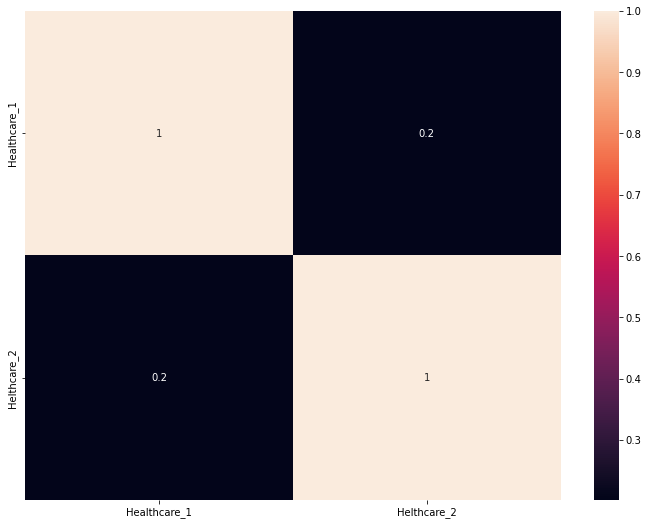

In [969]:
sns.heatmap(df.loc[:, 'Healthcare_1':'Helthcare_2'].corr(), annot = True)

Вывод - данные не скоррелированы

In [970]:
px.box(df, y = 'Healthcare_1')

Посмотрим количество и изучим потенциальные "выбросы" по столбцу 'Healthcare_1', по информации boxplot, это значения healthcare_1 больше 3300.

In [971]:
df[df['Healthcare_1']>3300]['Healthcare_1'].count()

212

In [972]:
df[df['Healthcare_1']>3300].head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
86          148      3  127.481583         NaN            1.0     16   
97           84      3   63.728237   38.960935            6.0      9   
179          86      1   36.805826   17.986014            7.0     10   
199          86      2   59.967230   38.609430            8.0     10   
207         161      3   81.749640   51.415229            7.0      5   

     HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  Social_3  \
86            1       2012   0.313925         B         B      4625        11   
97            9       1971   0.149666         B         B      4789         2   
179          12       1974   0.161976         B         A      7010         5   
199          25       2007   0.161976         B         A      7010         5   
207           8       1964   0.000699         B         B      3369        24   

     Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  Square/Rooms  
86         3855.0            2       10       B  510700.444735     42.493861  
97         4087.0            4        1       B  291058.080899     21.242746  
179        4508.0            3        7       B  183891.147301     36.805826  
199        4508.0            3        7       B  161307.511982     29.983615  
207        4129.0            0        3       B  383231.960856     27.249880

Даных довольно много, аномалий в других столбцах для этих данных не выявлено, принимаем решение оставвить эти данные без изменений.

Рассчитаем медианное значение столбца 'Healthcare_1' и заполним nan значениями медианы

In [973]:
median_healthcare_1 = df['Healthcare_1'].median()
median_healthcare_1

900.0

In [974]:
df['Healthcare_1'].fillna(median_healthcare_1, inplace = True)

In [975]:
df['Healthcare_1'].isna().sum()

0

Одним из основных факторов ценообразования объектов недвижимости является площадь объекта, изучим данные по площади

In [976]:
df['Square'].isna().sum()

0

In [977]:
px.box(df, y = 'Square')

In [978]:
np.quantile(df['Square'], q = 0.975)

100.5059905123128

In [979]:
np.quantile(df['Square'], q = 0.025)

32.216407044499284

Изучим данные по площади объектов выше upper fence (102)

In [980]:
df[df['Square']>102]['Square'].count()

226

Объектов с площадью более 102 м много, изучим самые крупные из них

In [981]:
df[df['Square']>200]['Square'].count()

3

In [982]:
df[df['Square']>200].head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1981          27      5  212.932361  211.231125            0.0      2   
1982          86      5  275.645284  233.949309           26.0     12   
9910          27      4  200.334539  201.627361           25.0      1   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  \
1981           3       2008   0.211401         B         B      1892   
1982          37       2011   0.161976         B         A      7010   
9910           2       2013   0.041116         B         B     14892   

      Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  \
1981         0         900.0            0        1       B  302211.260887   
1982         5        4508.0            3        7       B  455264.882666   
9910         4         900.0            1        4       B  528560.506016   

      Square/Rooms  
1981     42.586472  
1982     55.129057  
9910     50.083635

Эти данные принимаем решение оставить для дальнейшего анализа и расчетов 

Незаполненные ячейки присутствуют в столбце 'LifeSquare'. Изучим эти данные.

Округлим данные по жилой площади

In [983]:
df['LifeSquare'] = df['LifeSquare'].round(2)

In [984]:
df[df['LifeSquare'].isnull()].head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
7           74      2   80.312926         NaN            0.0     14   
8            1      2   64.511437         NaN            1.0      9   
21          27      2   64.711835         NaN            1.0     15   
23          54      3  118.907612         NaN            0.0      2   
25          74      2   82.667915         NaN            1.0     16   

    HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_2  Social_3  \
7            0       1977   0.075779         B         B      1437         3   
8           17       1977   0.007122         B         B       264         0   
21           1       1977   0.211401         B         B      1892         0   
23           0       1977   0.006076         B         B      5285         0   
25          17       1977   0.075779         B         B      1437         3   

    Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  Square/Rooms  
7          900.0            0        2       B  221244.156664     40.156463  
8          900.0            0        1       B  229102.795999     32.255719  
21         900.0            0        1       B  127200.026511     32.355917  
23         645.0            6        6       B  571069.052600     39.635871  
25         900.0            0        2       B  244145.827069     41.333957

Введем дополнительный столбец для расчетов отношения жилой площади к общей площади объекта недвижимости и посмотрим аномалии

In [985]:
df['LSquare/Square'] = df['LifeSquare']/df['Square']

In [986]:
px.box(df, y = 'LSquare/Square')

Найдем медианное значение показателя отношения жилой площади к площади всего объекта. Для замены аномальных данных будем использовать медиану именно относительного показателя, так как абсолютный показатель медианы жилой площади при большом разбросе значений площади всего объекта не корректен

In [987]:
median_ls_s = round(df['LSquare/Square'].median(), 2)
median_ls_s

0.62

Заменим данные nan и данные, где относительный показатель попадает в зону выбросов путем умножения общей площади на медиану показателя 'LSquare/Square'.

In [988]:
df.loc[df['LSquare/Square']<0.347, 'LifeSquare'] = df['Square']*median_ls_s

In [989]:
df.loc[df['LSquare/Square']>0.9, 'LifeSquare'] = df['Square']*median_ls_s

In [990]:
df['LifeSquare'].fillna(df['Square']*median_ls_s, inplace = True)

In [991]:
df['LifeSquare'].isna().sum()

0

In [992]:
df['LSquare/Square'] = df['LifeSquare']/df['Square']

In [993]:
px.box(df, y = 'LSquare/Square')

In [994]:
df['LifeSquare'].isna().sum()

0

Изучим данные столбца 'KitchenSquare'

In [995]:
df['KitchenSquare'].describe()

count    9981.000000
mean        6.279731
std        28.587136
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max      2014.000000
Name: KitchenSquare, dtype: float64

In [996]:
px.box(df, y = 'KitchenSquare')

Введем дополнительный столбец для расчетов отношения площади кухни к общей площади объекта недвижимости и посмотрим аномалии

In [997]:
df['KSquare/Square'] = df['KitchenSquare']/df['Square']

In [998]:
px.box(df, y = 'KSquare/Square')

Найдем медианное значение показателя отношения площади кухни к площади всего объекта. Для замены аномальных данных будем использовать медиану именно относительного показателя, так как абсолютный показатель медианы площади кухни при большом разбросе значений площади всего объекта не корректен

In [999]:
median_ks_s = round(df['KSquare/Square'].median(), 2)
median_ks_s

0.12

Посмотрим аномальные значения площадей кухни по отношению к общей площади (выше upper fence)

In [1000]:
df.loc[df['KSquare/Square']>0.378]['KSquare/Square'].count()

38

In [1001]:
df.loc[df['KSquare/Square']>0.378].head(10)

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
227            2      3   79.722243   44.730000           72.0     12   
551            6      1   48.128114   29.839431           48.0     21   
1064          62      1   47.100719   29.202446         2014.0      4   
1077          27      1   40.081042   24.850246           37.0     18   
1369          27      2   68.841073   42.681465           66.0      4   
1455          54      2   79.810535   49.482532           78.0     10   
1860         161      2   53.216778   32.640000           53.0      7   
2916          72      3   97.490674   60.444218           96.0     22   
2969          62      3  114.734473   71.135373          112.0      3   
3166         150      1   17.046188   10.568636            8.0      7   

      HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Social_2  Social_3  \
227           16       1987   0.130618         B  ...    10418         9   
551            1       2013   0.243205         B  ...     1564         0   
1064           1       2014   0.072158         B  ...      629         1   
1077          19       2019   0.211401         B  ...     1892         0   
1369           2       2014   0.017647         B  ...      469         0   
1455          15       2014   0.006076         B  ...     5285         0   
1860          17       1994   0.000699         B  ...     3369        24   
2916          25       2019   0.210473         B  ...     2398         2   
2969           3       2015   0.072158         B  ...      629         1   
3166          12       1982   0.300323         B  ...    10311         6   

      Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
227          900.0            1        9        B  370148.625285   
551          540.0            0        0        B  146950.912410   
1064         900.0            0        0        A  108337.484207   
1077         900.0            0        1        B   93218.650461   
1369         900.0            0        0        B  189244.249909   
1455         645.0            6        6        B  438708.707579   
1860        4129.0            0        3        B  261125.669724   
2916        1994.0            3        0        B  445074.956552   
2969         900.0            0        0        A  315245.521059   
3166         900.0            1        9        B   74222.110465   

      Square/Rooms  LSquare/Square  KSquare/Square  
227      26.574081        0.561073        0.903136  
551      48.128114        0.620000        0.997338  
1064     47.100719        0.620000       42.759432  
1077     40.081042        0.620000        0.923130  
1369     34.420536        0.620000        0.958730  
1455     39.905267        0.620000        0.977315  
1860     26.608389        0.613340        0.995927  
2916     32.496891        0.620000        0.984710  
2969     38.244824        0.620000        0.976167  
3166     17.046188        0.620000        0.469313  

[10 rows x 21 columns]

Видим, что не все эти данные имеют соотношение площадей, которое можно считать некорректным, поэтому для выявления аномалий возьмем более высокий показатель - рассмотрим данные, где соотношение площадей более 0,6. Отношение площади кухни к всей площади в этих данных может быть аномальным.

In [1002]:
df.loc[df['KSquare/Square']>0.6]['KSquare/Square'].count()

31

In [1003]:
df.loc[df['KSquare/Square']>0.6].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
227            2      3  79.722243   44.730000           72.0     12   
551            6      1  48.128114   29.839431           48.0     21   
1064          62      1  47.100719   29.202446         2014.0      4   
1077          27      1  40.081042   24.850246           37.0     18   
1369          27      2  68.841073   42.681465           66.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2  ... Social_2  Social_3  \
227           16       1987   0.130618         B  ...    10418         9   
551            1       2013   0.243205         B  ...     1564         0   
1064           1       2014   0.072158         B  ...      629         1   
1077          19       2019   0.211401         B  ...     1892         0   
1369           2       2014   0.017647         B  ...      469         0   

      Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
227          900.0            1        9        B  370148.625285   
551          540.0            0        0        B  146950.912410   
1064         900.0            0        0        A  108337.484207   
1077         900.0            0        1        B   93218.650461   
1369         900.0            0        0        B  189244.249909   

      Square/Rooms  LSquare/Square  KSquare/Square  
227      26.574081        0.561073        0.903136  
551      48.128114        0.620000        0.997338  
1064     47.100719        0.620000       42.759432  
1077     40.081042        0.620000        0.923130  
1369     34.420536        0.620000        0.958730  

[5 rows x 21 columns]

Эти данные имеют явные аномалии в показателе площади кухни, поэтому заменим их путем умножения общей площади на медиану показателя 'KSquare/Square'.

In [1004]:
df.loc[df['KSquare/Square']>0.6, 'KitchenSquare'] = df['Square']*median_ks_s

In [1005]:
df['KSquare/Square'] = df['KitchenSquare']/df['Square']

In [1006]:
df.loc[df['KSquare/Square']>0.6]['KSquare/Square'].count()

0

Рассмотрим данные, в которых показатель соотношения площадей кухни и всего объекта слишком маленький ниже квантиля 25% (0,0225)

In [1007]:
df.loc[df['KSquare/Square'] <= 0.0225 ]['KSquare/Square'].count()

2480

Эти данные имеют явные аномалии в показателе площади кухни, поэтому заменим их путем умножения общей площади на медиану показателя 'KSquare/Square'.

In [1008]:
df.loc[df['KSquare/Square'] <= 0.0225, 'KitchenSquare'] = df['Square']*median_ks_s

In [1009]:
df['KSquare/Square'] = df['KitchenSquare']/df['Square']

In [1010]:
px.box(df, y = 'KSquare/Square')

In [1011]:
df['KitchenSquare'] = df['KitchenSquare'].round(2)

Изучим другие показатели

In [1012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9981 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      9981 non-null   int64  
 1   Rooms           9981 non-null   int64  
 2   Square          9981 non-null   float64
 3   LifeSquare      9981 non-null   float64
 4   KitchenSquare   9981 non-null   float64
 5   Floor           9981 non-null   int64  
 6   HouseFloor      9981 non-null   int64  
 7   HouseYear       9981 non-null   int64  
 8   Ecology_1       9981 non-null   float64
 9   Ecology_2       9981 non-null   object 
 10  Ecology_3       9981 non-null   object 
 11  Social_2        9981 non-null   int64  
 12  Social_3        9981 non-null   int64  
 13  Healthcare_1    9981 non-null   float64
 14  Helthcare_2     9981 non-null   int64  
 15  Shops_1         9981 non-null   int64  
 16  Shops_2         9981 non-null   object 
 17  Price           9981 non-null   f

In [1013]:
df['Ecology_1'] = df['Ecology_1'].round(2)

In [1014]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [1015]:
df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [1016]:
df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

Прерведем категориальные столбцы в числовой формат с помощью бинарных переменных

In [1017]:
def format_AB():
    for el in ['A', 'B']:
        for column in ['Ecology_2', 'Ecology_3', 'Shops_2']:
            df.loc[df[column]==el, column] = f'{column}_{el}'

In [1018]:
format_AB()

In [1019]:
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.440000           6.00      7           9   
1          41      3  65.683640   40.050000           8.00      7           9   
2          53      2  44.947953   29.200000           5.39      8          12   
3          58      2  53.352981   33.078848           9.00      8          17   
4          99      1  39.649192   23.780000           7.00     11          12   

   HouseYear  Ecology_1    Ecology_2  ... Social_2  Social_3  Healthcare_1  \
0       1969       0.09  Ecology_2_B  ...     7976         5         900.0   
1       1978       0.00  Ecology_2_B  ...    10309         1         240.0   
2       1968       0.05  Ecology_2_B  ...     7759         0         229.0   
3       1977       0.44  Ecology_2_B  ...     5735         3        1084.0   
4       1976       0.01  Ecology_2_B  ...     5776         1        2078.0   

   Helthcare_2  Shops_1    Shops_2          Price  Square/Rooms  \
0            0       11  Shops_2_B  184966.930730     23.990781   
1            1       16  Shops_2_B  300009.450063     21.894547   
2            1        3  Shops_2_B  220925.908524     22.473976   
3            0        5  Shops_2_B  175616.227217     26.676491   
4            2        4  Shops_2_B  150226.531644     39.649192   

   LSquare/Square  KSquare/Square  
0        0.613569        0.125048  
1        0.609741        0.121796  
2        0.649640        0.120000  
3        0.620000        0.168688  
4        0.599760        0.176548  

[5 rows x 21 columns]

In [1020]:
df = pd.concat([df, pd.get_dummies(df['Ecology_2']), pd.get_dummies(df['Ecology_3']), pd.get_dummies(df['Shops_2'])], axis=1)

In [1021]:
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.440000           6.00      7           9   
1          41      3  65.683640   40.050000           8.00      7           9   
2          53      2  44.947953   29.200000           5.39      8          12   
3          58      2  53.352981   33.078848           9.00      8          17   
4          99      1  39.649192   23.780000           7.00     11          12   

   HouseYear  Ecology_1    Ecology_2  ...          Price  Square/Rooms  \
0       1969       0.09  Ecology_2_B  ...  184966.930730     23.990781   
1       1978       0.00  Ecology_2_B  ...  300009.450063     21.894547   
2       1968       0.05  Ecology_2_B  ...  220925.908524     22.473976   
3       1977       0.44  Ecology_2_B  ...  175616.227217     26.676491   
4       1976       0.01  Ecology_2_B  ...  150226.531644     39.649192   

   LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B Ecology_3_A  \
0        0.613569        0.125048            0            1           0   
1        0.609741        0.121796            0            1           0   
2        0.649640        0.120000            0            1           0   
3        0.620000        0.168688            0            1           0   
4        0.599760        0.176548            0            1           0   

   Ecology_3_B  Shops_2_A  Shops_2_B  
0            1          0          1  
1            1          0          1  
2            1          0          1  
3            1          0          1  
4            1          0          1  

[5 rows x 27 columns]

Изучим данные по этажу и этажности дома. Этаж не может быть выше этажности

In [1022]:
df[df['HouseFloor']-df['Floor']<0]['Floor'].count()

1816

In [1023]:
df[df['HouseFloor']-df['Floor']<0].tail(10)

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
9959           0      1   32.416925   19.260000            6.0      6   
9962         158      2   63.131655   41.870000            8.0      9   
9971          67      2   58.629682   36.330000            9.0     19   
9973         115      2   48.201451   33.400000            8.0     15   
9975          27      2   60.055527   37.234426           12.0     16   
9984          52      3   64.074977   47.630000            6.0     11   
9985          27      1   38.968338   24.160370            1.0     10   
9989          96      3   90.055233   47.860000           11.0     26   
9991           3      3  101.622794   51.630000           12.0     18   
9995          32      2   50.401785   30.480000            5.0      6   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
9959           5       1963       0.32  Ecology_2_B  ...  125579.315184   
9962           8       1939       0.04  Ecology_2_B  ...   87268.098968   
9971          17       1989       0.10  Ecology_2_B  ...  228845.682509   
9973          14       1972       0.00  Ecology_2_B  ...  197405.312185   
9975          15       1977       0.07  Ecology_2_B  ...  190325.071232   
9984           9       1983       0.37  Ecology_2_B  ...  226434.880156   
9985           1       1977       0.21  Ecology_2_B  ...   95529.569405   
9989          24       2005       0.04  Ecology_2_B  ...  441108.911237   
9991          17       2000       0.27  Ecology_2_B  ...  212883.501504   
9995           5       1968       0.14  Ecology_2_B  ...  196684.316040   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
9959     32.416925        0.594134        0.185089            0            1   
9962     31.565827        0.663217        0.126719            0            1   
9971     29.314841        0.619652        0.153506            0            1   
9973     24.100725        0.692925        0.165970            0            1   
9975     30.027763        0.620000        0.199815            0            1   
9984     21.358326        0.743348        0.093640            0            1   
9985     38.968338        0.620000        0.025662            0            1   
9989     30.018411        0.531452        0.122147            0            1   
9991     33.874265        0.508055        0.118084            0            1   
9995     25.200892        0.604740        0.099203            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
9959           0            1          0          1  
9962           0            1          0          1  
9971           0            1          1          0  
9973           0            1          0          1  
9975           0            1          1          0  
9984           0            1          0          1  
9985           0            1          0          1  
9989           0            1          0          1  
9991           0            1          0          1  
9995           0            1          0          1  

[10 rows x 27 columns]

Там, где этажность дома нулевая, проставим значения этажа

In [1024]:
df[df['HouseFloor']==0]['Floor'].count()

268

In [1025]:
df.loc[df['HouseFloor']==0, 'HouseFloor'] = df['Floor'] 

Посмотрим уникальные значения этажности и эжатей объектов, выявим и скорректируем аномальные значения

In [1026]:
df['HouseFloor'].unique()

array([  9,  12,  17,   5,  14,   8,   4,  25,   1,  22,   2,  16,  15,
        20,   3,   6,  10,  11,   7,  24,  28,  19,  18,  23,  32,  40,
        27,  21,  13,  45,  30,  37,  48,  47,  44,  39,  26,  36,  29,
        99,  38, 117,  31])

In [1027]:
df['Floor'].unique()

array([ 7,  8, 11,  5,  3, 14,  9, 13,  1,  6,  4, 16, 12, 15, 19,  2, 17,
       20, 10, 18, 26, 23, 22, 21, 25, 32, 24, 28, 27, 42, 31, 37, 33])

In [1028]:
df[df['HouseFloor']>30]['Floor'].count()

28

In [1029]:
px.box(df, y = 'HouseFloor')

In [1030]:
df.loc[(df['DistrictId']==30)&(df['HouseYear']==1977)&(df['Rooms'] == 2)&(df['Floor'] == 8)]['Floor'].count()

5

In [1031]:
df.loc[(df['DistrictId']==30)&(df['HouseYear']==1977)&(df['Rooms'] == 2)&(df['Floor'] == 8)].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
323           30      2  62.180283   38.551776           7.46      8   
4195          30      2  66.397282   36.840000           7.97      8   
6188          30      2  65.665172   40.712406           7.88      8   
8324          30      2  66.144841   41.009801           7.94      8   
8854          30      2  65.773749   40.779724           7.89      8   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
323           17       1977        0.0  Ecology_2_B  ...  165895.486923   
4195           1       1977        0.0  Ecology_2_B  ...  188677.355552   
6188          17       1977        0.0  Ecology_2_B  ...  182824.309938   
8324          17       1977        0.0  Ecology_2_B  ...  198699.423359   
8854         117       1977        0.0  Ecology_2_B  ...  207248.370520   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
323      31.090142        0.620000            0.12            0            1   
4195     33.198641        0.554842            0.12            0            1   
6188     32.832586        0.620000            0.12            0            1   
8324     33.072420        0.620000            0.12            0            1   
8854     32.886874        0.620000            0.12            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
323            0            1          0          1  
4195           0            1          0          1  
6188           0            1          0          1  
8324           0            1          0          1  
8854           0            1          0          1  

[5 rows x 27 columns]

Исходя их анализа выборки в значении этажности допущены ошибки, исправим их

In [1032]:
df.loc[df['HouseFloor'] == 117, 'HouseFloor'] = 17

In [1033]:
df.loc[(df['DistrictId']==30)&(df['HouseYear']==1977)&(df['Rooms'] == 2)&(df['Floor'] == 8)&(df['HouseFloor'] == 1)].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4195          30      2  66.397282       36.84           7.97      8   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
4195           1       1977        0.0  Ecology_2_B  ...  188677.355552   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
4195     33.198641        0.554842            0.12            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
4195           0            1          0          1  

[1 rows x 27 columns]

In [1034]:
df.loc[(df['DistrictId']==30)&(df['HouseYear']==1977)&(df['Rooms'] == 2)&(df['Floor'] == 8)&(df['HouseFloor'] == 1), 'HouseFloor'] = 17

In [1035]:
df.loc[(df['DistrictId']==30)&(df['HouseYear']==1977)&(df['Rooms'] == 2)&(df['Floor'] == 8)].head(10)

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
323           30      2  62.180283   38.551776           7.46      8   
4195          30      2  66.397282   36.840000           7.97      8   
6188          30      2  65.665172   40.712406           7.88      8   
8324          30      2  66.144841   41.009801           7.94      8   
8854          30      2  65.773749   40.779724           7.89      8   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
323           17       1977        0.0  Ecology_2_B  ...  165895.486923   
4195          17       1977        0.0  Ecology_2_B  ...  188677.355552   
6188          17       1977        0.0  Ecology_2_B  ...  182824.309938   
8324          17       1977        0.0  Ecology_2_B  ...  198699.423359   
8854          17       1977        0.0  Ecology_2_B  ...  207248.370520   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
323      31.090142        0.620000            0.12            0            1   
4195     33.198641        0.554842            0.12            0            1   
6188     32.832586        0.620000            0.12            0            1   
8324     33.072420        0.620000            0.12            0            1   
8854     32.886874        0.620000            0.12            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
323            0            1          0          1  
4195           0            1          0          1  
6188           0            1          0          1  
8324           0            1          0          1  
8854           0            1          0          1  

[5 rows x 27 columns]

In [1036]:
df[df['HouseFloor']>50].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
6131           5      1  51.944587   32.205644           6.23      6   
8599          74      2  71.747869   44.483679           9.00      5   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
6131          99       1977       0.15  Ecology_2_B  ...  296127.115515   
8599          99       1977       0.08  Ecology_2_B  ...  243329.912579   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
6131     51.944587            0.62        0.120000            0            1   
8599     35.873935            0.62        0.125439            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
6131           0            1          0          1  
8599           0            1          0          1  

[2 rows x 27 columns]

In [1037]:
df.loc[(df['DistrictId']==74)&(df['HouseYear']==1977)&(df['Floor'] == 5)].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3666          74      1  54.662565   33.890790           6.56      5   
7884          74      2  75.455509   46.782415           9.05      5   
8599          74      2  71.747869   44.483679           9.00      5   
9014          74      2  71.207458   44.148624           8.54      5   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
3666           5       1977       0.08  Ecology_2_B  ...  174065.008685   
7884           1       1977       0.08  Ecology_2_B  ...  249093.779691   
8599          99       1977       0.08  Ecology_2_B  ...  243329.912579   
9014           5       1977       0.08  Ecology_2_B  ...  244700.814865   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
3666     54.662565            0.62        0.120000            0            1   
7884     37.727754            0.62        0.120000            0            1   
8599     35.873935            0.62        0.125439            0            1   
9014     35.603729            0.62        0.120000            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
3666           0            1          0          1  
7884           0            1          0          1  
8599           0            1          0          1  
9014           0            1          0          1  

[4 rows x 27 columns]

Две строки содержат явные ошибки, исправим их

In [1038]:
df.loc[(df['DistrictId']==74)&(df['HouseYear']==1977)&(df['Floor'] == 5), 'HouseFloor'] = 5

In [1039]:
df.loc[(df['DistrictId']==74)&(df['HouseYear']==1977)&(df['Floor'] == 5)].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3666          74      1  54.662565   33.890790           6.56      5   
7884          74      2  75.455509   46.782415           9.05      5   
8599          74      2  71.747869   44.483679           9.00      5   
9014          74      2  71.207458   44.148624           8.54      5   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
3666           5       1977       0.08  Ecology_2_B  ...  174065.008685   
7884           5       1977       0.08  Ecology_2_B  ...  249093.779691   
8599           5       1977       0.08  Ecology_2_B  ...  243329.912579   
9014           5       1977       0.08  Ecology_2_B  ...  244700.814865   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
3666     54.662565            0.62        0.120000            0            1   
7884     37.727754            0.62        0.120000            0            1   
8599     35.873935            0.62        0.125439            0            1   
9014     35.603729            0.62        0.120000            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
3666           0            1          0          1  
7884           0            1          0          1  
8599           0            1          0          1  
9014           0            1          0          1  

[4 rows x 27 columns]

In [1040]:
df.loc[(df['DistrictId']==5)&(df['HouseYear']==1977)].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1194           5      1  35.550065   20.690000           7.00      2   
2837           5      2  79.025250   48.995655          10.00     11   
6131           5      1  51.944587   32.205644           6.23      6   
6134           5      1  45.166756   28.003389           5.42      5   
9289           5      2  56.581825   30.240000           8.00      6   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
1194          14       1977       0.15  Ecology_2_B  ...  196094.775997   
2837          20       1977       0.15  Ecology_2_B  ...  428767.264304   
6131          99       1977       0.15  Ecology_2_B  ...  296127.115515   
6134           5       1977       0.15  Ecology_2_B  ...  265601.350449   
9289          14       1977       0.15  Ecology_2_B  ...  298194.513179   

      Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
1194     35.550065        0.581996        0.196905            0            1   
2837     39.512625        0.620000        0.126542            0            1   
6131     51.944587        0.620000        0.120000            0            1   
6134     45.166756        0.620000        0.120000            0            1   
9289     28.290913        0.534447        0.141388            0            1   

     Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
1194           0            1          0          1  
2837           0            1          0          1  
6131           0            1          0          1  
6134           0            1          0          1  
9289           0            1          0          1  

[5 rows x 27 columns]

In [1041]:
df.loc[(df['DistrictId']==5)&(df['HouseYear']==1977)&(df['Floor'] == 6), 'HouseFloor'] = 14

In [1042]:
df['HouseFloor'].unique()

array([ 9, 12, 17,  5, 14,  8,  4, 25,  1, 22,  2, 16, 15, 20,  3,  6, 10,
       11,  7, 24, 28, 19, 18, 23, 32, 40, 27, 21, 13, 45, 30, 37, 48, 47,
       44, 39, 26, 36, 29, 38, 31])

In [1043]:
df['Floor'].unique()

array([ 7,  8, 11,  5,  3, 14,  9, 13,  1,  6,  4, 16, 12, 15, 19,  2, 17,
       20, 10, 18, 26, 23, 22, 21, 25, 32, 24, 28, 27, 42, 31, 37, 33])

In [1044]:
df[df['HouseFloor']-df['Floor']<0]['Floor'].count()

1546

In [1045]:
df[df['HouseFloor']-df['Floor']<0].head(10)

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
14          27      1   53.769097   33.336840           6.45      5   
16          27      2   49.360648   31.990000           5.00      6   
21          27      2   64.711835   40.121338           7.77     15   
35         200      3   85.280389   58.450000           9.00      6   
51          94      1   35.280894   23.350000           6.00     11   
67          57      2   45.964890   29.140000           5.00      7   
68          77      1   42.678844   23.920000           8.00     14   
72          74      1   52.457589   32.523705           6.29     18   
76          34      1   47.909327   42.780000           5.75      2   
86         148      3  127.481583   79.038582          15.30     16   

    HouseFloor  HouseYear  Ecology_1    Ecology_2  ...          Price  \
14           4       1977       0.07  Ecology_2_B  ...  140647.565937   
16           5       1983       0.05  Ecology_2_B  ...  117000.381287   
21           1       1977       0.21  Ecology_2_B  ...  127200.026511   
35           5       1960       0.00  Ecology_2_B  ...  402871.916317   
51           9       1971       0.28  Ecology_2_B  ...  148862.210174   
67           5       1963       0.13  Ecology_2_B  ...  180538.898922   
68          12       1983       0.00  Ecology_2_B  ...  179784.473334   
72          17       1977       0.08  Ecology_2_B  ...  160292.163702   
76           1       2016       0.07  Ecology_2_B  ...  181167.642404   
86           1       2012       0.31  Ecology_2_B  ...  510700.444735   

    Square/Rooms  LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  \
14     53.769097        0.620000        0.120000            0            1   
16     24.680324        0.648087        0.101295            0            1   
21     32.355917        0.620000        0.120000            0            1   
35     28.426796        0.685386        0.105534            0            1   
51     35.280894        0.661831        0.170064            0            1   
67     22.982445        0.633962        0.108779            0            1   
68     42.678844        0.560465        0.187447            0            1   
72     52.457589        0.620000        0.120000            0            1   
76     47.909327        0.892937        0.120000            0            1   
86     42.493861        0.620000        0.120000            0            1   

   Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
14           0            1          1          0  
16           0            1          0          1  
21           0            1          0          1  
35           0            1          0          1  
51           0            1          0          1  
67           0            1          1          0  
68           0            1          0          1  
72           0            1          0          1  
76           0            1          0          1  
86           0            1          0          1  

[10 rows x 27 columns]

Данные этажности и этажа дома там, где этаж оказалсь выше этажности, поменяем местами.

In [1046]:
df['HouseFloor_new'] = df['Floor']

In [1047]:
df['Floor_New'] = df['HouseFloor']

In [1048]:
df.loc[df['HouseFloor']-df['Floor']<0, 'HouseFloor'] = df['HouseFloor_new']

In [1049]:
df.loc[df['HouseFloor']-df['Floor']<0, 'Floor'] = df['Floor_New']

In [1050]:
df[df['HouseFloor']-df['Floor']<0]['Floor'].count()

0

In [1051]:
df.drop(labels = ['HouseFloor_new'], axis = 1, inplace = True)

In [1052]:
df.drop(labels = ['Floor_New'], axis = 1, inplace = True)

In [1053]:
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.440000           6.00      7           9   
1          41      3  65.683640   40.050000           8.00      7           9   
2          53      2  44.947953   29.200000           5.39      8          12   
3          58      2  53.352981   33.078848           9.00      8          17   
4          99      1  39.649192   23.780000           7.00     11          12   

   HouseYear  Ecology_1    Ecology_2  ...          Price  Square/Rooms  \
0       1969       0.09  Ecology_2_B  ...  184966.930730     23.990781   
1       1978       0.00  Ecology_2_B  ...  300009.450063     21.894547   
2       1968       0.05  Ecology_2_B  ...  220925.908524     22.473976   
3       1977       0.44  Ecology_2_B  ...  175616.227217     26.676491   
4       1976       0.01  Ecology_2_B  ...  150226.531644     39.649192   

   LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B Ecology_3_A  \
0        0.613569        0.125048            0            1           0   
1        0.609741        0.121796            0            1           0   
2        0.649640        0.120000            0            1           0   
3        0.620000        0.168688            0            1           0   
4        0.599760        0.176548            0            1           0   

   Ecology_3_B  Shops_2_A  Shops_2_B  
0            1          0          1  
1            1          0          1  
2            1          0          1  
3            1          0          1  
4            1          0          1  

[5 rows x 27 columns]

Введем и проанализируем стоимость одного квадратного метра объекта недвижимости

In [1054]:
df['Price/Square'] = df['Price']/df['Square']

In [1055]:
px.box(df, y = 'Price/Square')

Посмотрим данные с ценами квадратного метра выше upper fence и ниже 1000 за метр квадратный

In [1056]:
df[df['Price/Square']>7342]['Price/Square'].count()

82

In [1057]:
df[df['Price/Square']>7342].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
186         137      3  70.223604       44.54           13.0      3   
262         181      2  62.198335       39.68            5.0      7   
293         181      2  49.978867       29.67            7.0      9   
422         183      1  37.774297       19.48            6.0      8   
436         157      3  54.289523       39.04            5.0      7   

     HouseFloor  HouseYear  Ecology_1    Ecology_2  ... Square/Rooms  \
186           8       1955       0.20  Ecology_2_B  ...    23.407868   
262           9       1948       0.00  Ecology_2_B  ...    31.099168   
293           9       1966       0.00  Ecology_2_B  ...    24.989433   
422          13       1971       0.04  Ecology_2_B  ...    37.774297   
436           8       1961       0.00  Ecology_2_B  ...    18.096508   

     LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
186        0.634260        0.185123            0            1            0   
262        0.637959        0.080388            0            1            0   
293        0.593651        0.140059            0            1            0   
422        0.515695        0.158838            0            1            0   
436        0.719107        0.092099            0            1            0   

    Ecology_3_B  Shops_2_A  Shops_2_B  Price/Square  
186           1          0          1   7506.319872  
262           1          0          1   8700.768533  
293           1          0          1   8268.740559  
422           1          0          1   9554.488763  
436           1          0          1   9278.257064  

[5 rows x 28 columns]

In [1058]:
np.sort(df['DistrictId'].unique(), axis=-1, kind='quicksort', order=None) 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [1059]:
df.loc[df['DistrictId'] == 181]['DistrictId'].count()

3

In [1060]:
df.loc[df['DistrictId'] == 181].head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
262          181      2  62.198335       39.68            5.0      7   
293          181      2  49.978867       29.67            7.0      9   
7053         181      1  34.911269       18.43            6.0     10   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ... Square/Rooms  \
262            9       1948        0.0  Ecology_2_B  ...    31.099168   
293            9       1966        0.0  Ecology_2_B  ...    24.989433   
7053          12       1955        0.0  Ecology_2_B  ...    34.911269   

      LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
262         0.637959        0.080388            0            1            0   
293         0.593651        0.140059            0            1            0   
7053        0.527910        0.171864            0            1            0   

     Ecology_3_B  Shops_2_A  Shops_2_B  Price/Square  
262            1          0          1   8700.768533  
293            1          0          1   8268.740559  
7053           1          0          1  11386.831424  

[3 rows x 28 columns]

In [1061]:
df[df['Price/Square']<1000]['Price/Square'].count()

5

In [1062]:
df[df['Price/Square']<1000].head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
696          113      3   94.417148   56.750000           11.0      6   
3723          33      4  101.554252   62.963636            9.0      4   
4442         152      3   88.978324   56.940000           12.0      7   
8373          57      3   84.206197   49.920000            8.0      7   
9751          36      3   86.594116   54.700000           10.0      7   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ... Square/Rooms  \
696           18       2008       0.05  Ecology_2_B  ...    31.472383   
3723           5       1958       0.05  Ecology_2_B  ...    25.388563   
4442           7       1958       0.04  Ecology_2_B  ...    29.659441   
8373           7       2005       0.09  Ecology_2_B  ...    28.068732   
9751          17       2008       0.09  Ecology_2_B  ...    28.864705   

      LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
696         0.601056        0.116504            0            1            0   
3723        0.620000        0.088623            0            1            0   
4442        0.639931        0.134864            0            1            0   
8373        0.592830        0.095005            0            1            0   
9751        0.631683        0.115481            0            1            0   

     Ecology_3_B  Shops_2_A  Shops_2_B  Price/Square  
696            1          0          1    752.588644  
3723           1          0          1    810.825491  
4442           1          0          1    960.907842  
8373           1          0          1    846.961137  
9751           1          0          1    987.800779  

[5 rows x 28 columns]

В целом данные не содержат явных аномалий, принимаем решение оставить их для модели

Посмотрим график зависимости цены объекта от площади

In [1063]:
rcParams['figure.figsize'] = 20,7

Text(0.5, 1.0, 'График зависимости цены от площади')

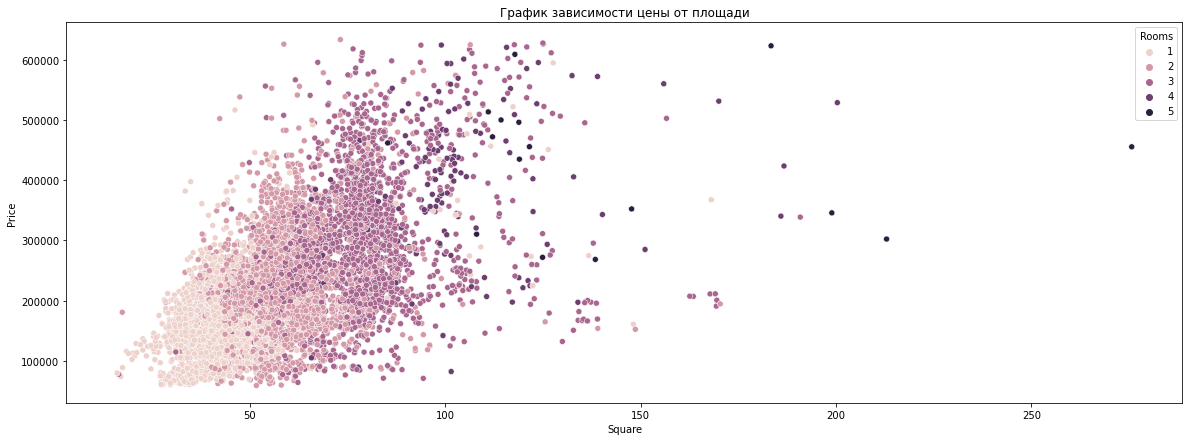

In [1064]:
sns.scatterplot(data = df, x = 'Square', y = 'Price', hue = 'Rooms')
plt.title('График зависимости цены от площади')

На графике видны прямая зависимость цены объекта от площади. При этом также видна прямая зависимость цены от количества комнат в квартире.

In [1065]:
df.loc[(df['Square']>200)&(df['Price']>400000)]['Square'].count()

2

In [1066]:
df.loc[(df['Square']>200)].head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1981          27      5  212.932361  132.018064          25.55      2   
1982          86      5  275.645284  233.950000          26.00     12   
9910          27      4  200.334539  124.207414          25.00      1   

      HouseFloor  HouseYear  Ecology_1    Ecology_2  ... Square/Rooms  \
1981           3       2008       0.21  Ecology_2_B  ...    42.586472   
1982          37       2011       0.16  Ecology_2_B  ...    55.129057   
9910           2       2013       0.04  Ecology_2_B  ...    50.083635   

      LSquare/Square  KSquare/Square  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
1981        0.620000        0.120000            0            1            0   
1982        0.848736        0.094324            0            1            1   
9910        0.620000        0.124791            0            1            0   

     Ecology_3_B  Shops_2_A  Shops_2_B  Price/Square  
1981           1          0          1   1419.282909  
1982           0          0          1   1651.633128  
9910           1          0          1   2638.389304  

[3 rows x 28 columns]

In [1067]:
df['Price/Square'].describe()

count     9981.000000
mean      3891.676050
std       1247.261486
min        752.588644
25%       2920.237821
50%       3909.174658
75%       4690.504640
max      11854.652892
Name: Price/Square, dtype: float64

Введем дополнительные столбцы для учета квартир на первых и последних этажах. Цены на эти квартиры могут отличаться от среднестатистических, поэтому выделим эти показатели в отдельные столбцы.

In [1068]:
df['FirstFloor'] = 0

In [1069]:
df.loc[df['Floor'] == 1, 'FirstFloor'] = 1

In [1070]:
df['LastFloor'] = 0

In [1071]:
df.loc[df['Floor'] == df['HouseFloor'], 'LastFloor'] = 1

Проанализируем медианную цену квадратного метра по районам

In [1072]:
df_dist_price_sq_median = df.groupby('DistrictId').median().round(2)['Price/Square']
df_dist_price_sq_median

DistrictId
0      3935.91
1      3251.20
2      4550.71
3      3892.20
4      5716.89
        ...   
202    7447.53
205    5101.02
207    5550.68
208    8005.61
209    4176.44
Name: Price/Square, Length: 205, dtype: float64

In [1073]:
df_dist_price_sq_median = df_dist_price_sq_median.to_frame()

In [1074]:
df_dist_price_sq_median['DistrictId'] = df_dist_price_sq_median.index

In [1075]:
df_dist_price_sq_median.columns

Index(['Price/Square', 'DistrictId'], dtype='object')

# График медианной цены квадратного метра по районам

Text(0.5, 1.0, 'График зависимости средней цены квадратного метра от района')

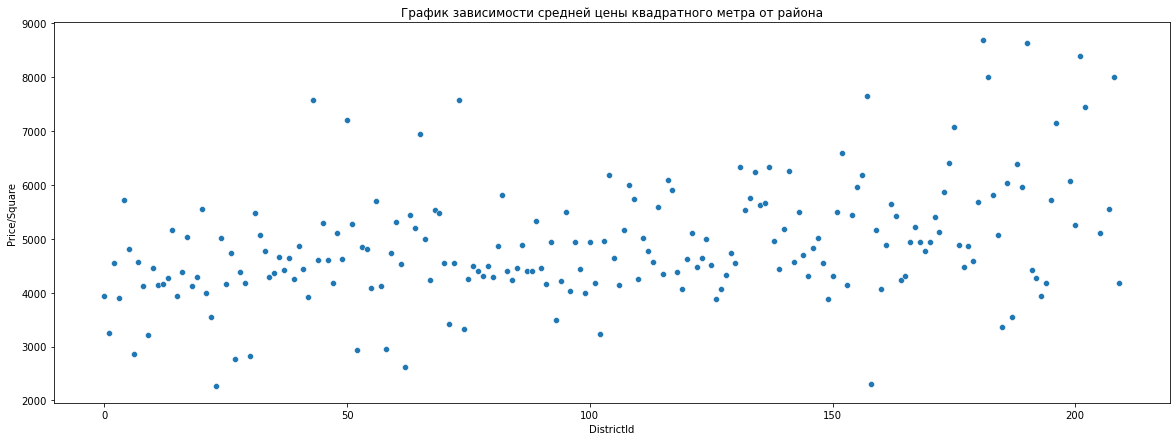

In [1076]:
sns.scatterplot(data = df_dist_price_sq_median, x = 'DistrictId', y = 'Price/Square')
plt.title('График зависимости средней цены квадратного метра от района')

Медианная цена не имеет явной тенденции изменения в зависимости от района. Единственно, в районах 1-100 присутствует больше объектов с более низкой медианной ценой, в районах 150-200 - есть больше показателей высокой медианной цены квадратного метра.

# График цены квадратного метра по районам в разрезе количества комнат

Text(0.5, 1.0, 'График зависимости цены квадратного метра от района в разрезе количества комнат в квартире')

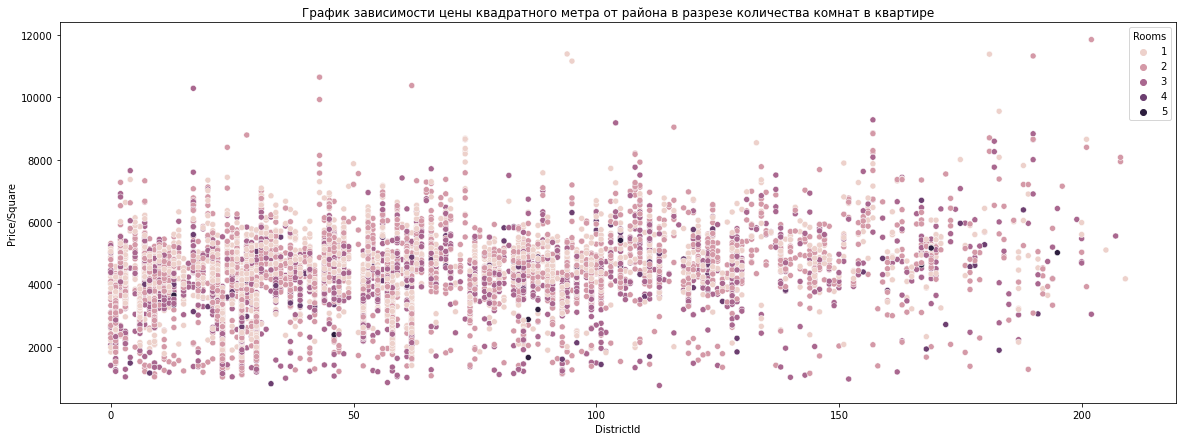

In [1077]:
sns.scatterplot(data = df, x = 'DistrictId', y = 'Price/Square', hue = 'Rooms')
plt.title('График зависимости цены квадратного метра от района в разрезе количества комнат в квартире')

# Графики цен квадратного метра по районам в разрезе количества комнат и с учетом показателя "Первый этаж" и "Последний этаж"

Text(0.5, 1.0, 'График зависимости цены квадратного метра от района с учетом нахождения квартиры на 1 этаже')

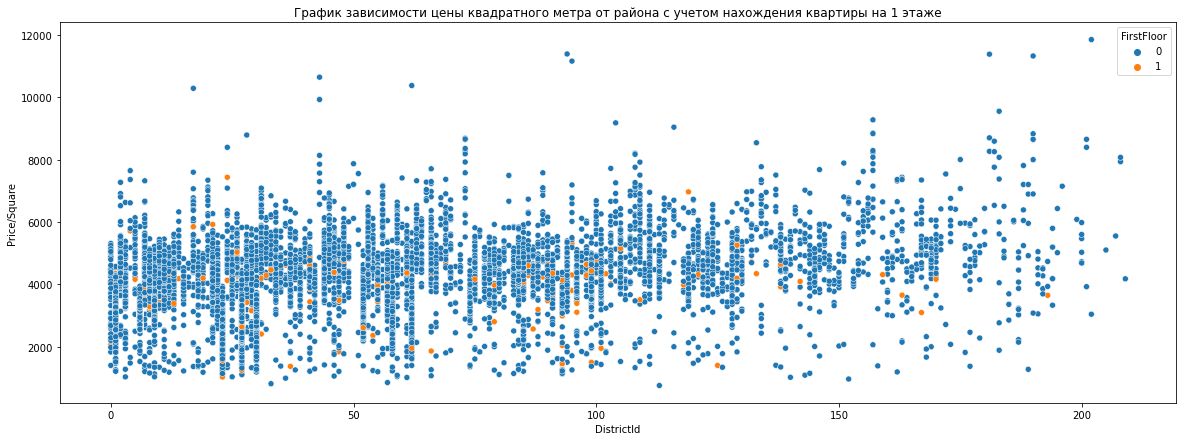

In [1078]:
sns.scatterplot(data = df, x = 'DistrictId', y = 'Price/Square', hue = 'FirstFloor')
plt.title('График зависимости цены квадратного метра от района с учетом нахождения квартиры на 1 этаже')

Text(0.5, 1.0, 'График зависимости цены квадратного метра от района с учетом нахождения квартиры на последнем этаже')

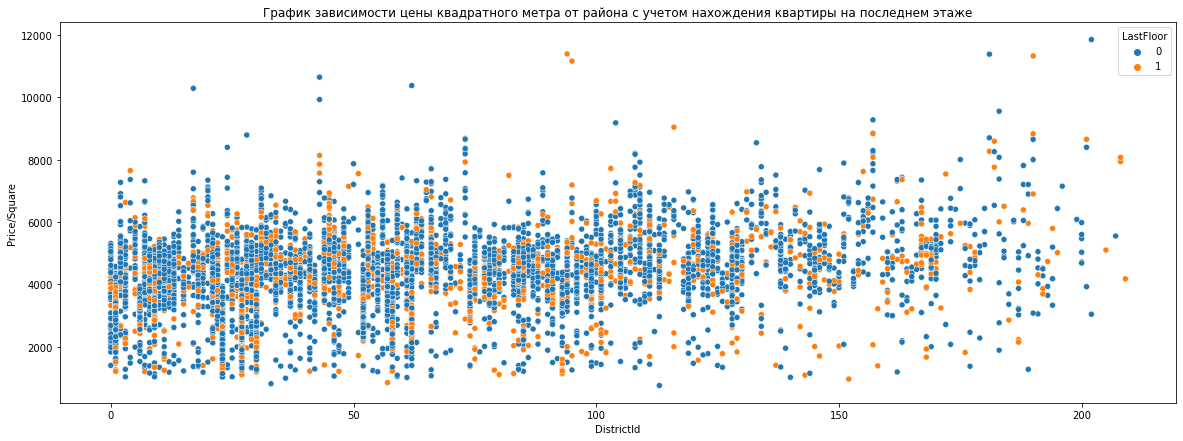

In [1079]:
sns.scatterplot(data = df, x = 'DistrictId', y = 'Price/Square', hue = 'LastFloor')
plt.title('График зависимости цены квадратного метра от района с учетом нахождения квартиры на последнем этаже')

По итогам анализа графиков можно заключить, что нахождение квартиры на первом или последнем этаже не оказывает существенного влияния на цену квадратного метра по районам. Этот признак не имеет смысла добавлять в модель для обучения. 

Text(0.5, 1.0, 'Распределение цены квадратного метра')

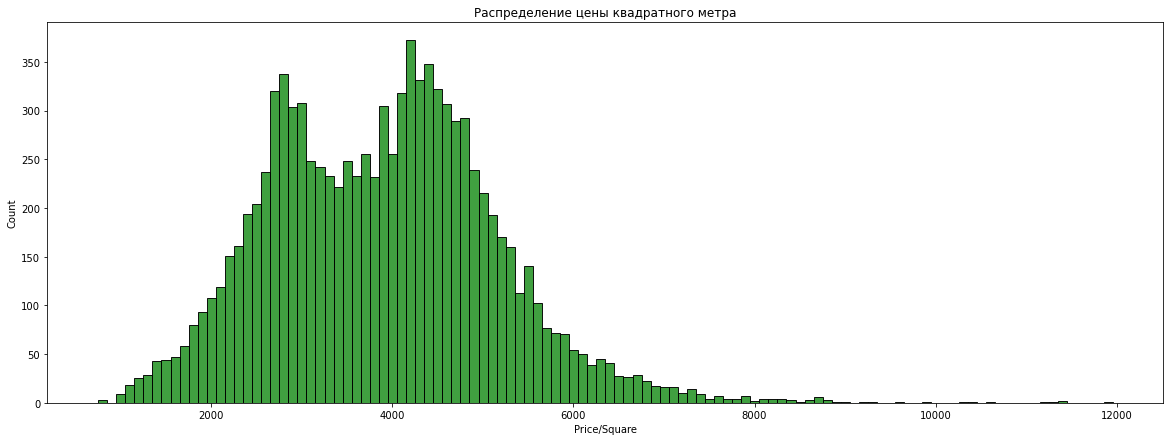

In [1080]:
sns.histplot(df['Price/Square'], binwidth = 100, color = 'green')
plt.title('Распределение цены квадратного метра')

Гистограмма распределения цены квадратного метра показывает, что есть тенденция к нормальному распределению с "хвостом" в сторону увеличения цены квадратного метра, что связано с наличием маленького числа объектов с высокой ценой квадратного метра.

Text(0.5, 1.0, 'График зависимости цены квадратного метра от площади')

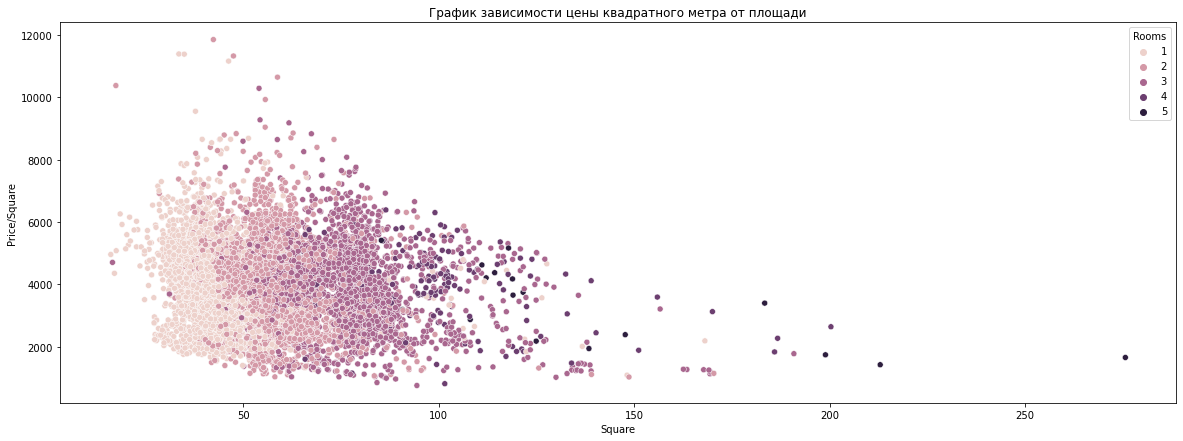

In [1081]:
sns.scatterplot(data = df, x = 'Square', y = 'Price/Square', hue = 'Rooms')
plt.title('График зависимости цены квадратного метра от площади')

Этот график показывает обратную зависимость цены квадратного метра от площади объекта - чем больше площадь объекта, тем ниже цена квадратного метра, в разрезе количества комнат можно также наблюдать тенденцию к снижению цены квадратного метра с ростом количества комнат в квартире.

Text(0.5, 1.0, 'График распределения цен')

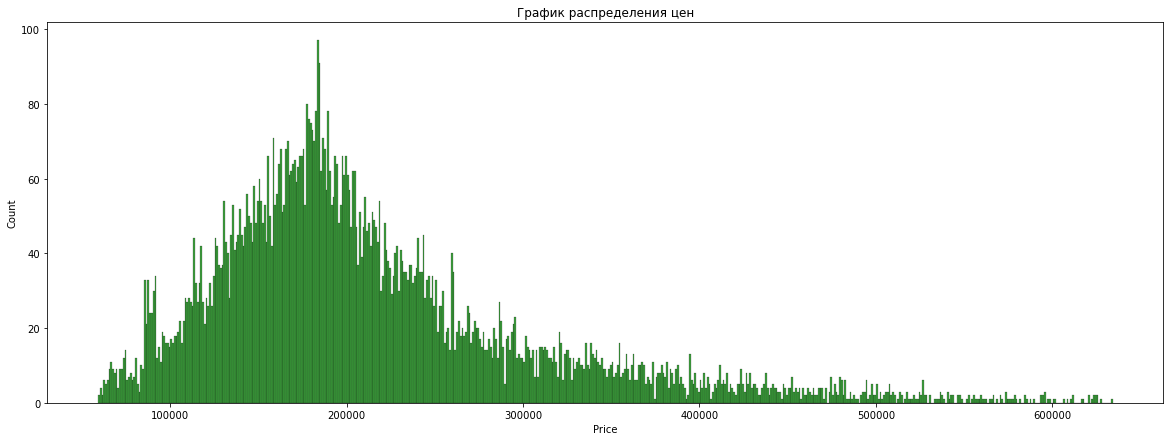

In [1082]:
sns.histplot(df['Price'], binwidth = 1000, color = 'green')
plt.title('График распределения цен')

Гисторамма цены объектов недвижимости показывает наличие "хвоста" в сторону увеличения цены, что связано с наличием меньшего количества объектов недвижимости с очень высокой ценой. Но их много и они должны быть учтены при обучении модели.

## Подготовка датасета к обучению модели

In [1083]:
df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1',
       'Shops_2', 'Price', 'Square/Rooms', 'LSquare/Square', 'KSquare/Square',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'Price/Square', 'FirstFloor', 'LastFloor'],
      dtype='object')

In [1084]:
x = df[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1','Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1','Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B']]

In [1085]:
y = df[['Price']]

In [1086]:
from sklearn.model_selection import train_test_split

In [1087]:
x_train, x_valid, y_train, y_valid =train_test_split(x, y, test_size = 0.25, random_state = 100)

In [1088]:
from sklearn.preprocessing import RobustScaler

In [1089]:
scaler = RobustScaler()

In [1090]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

In [1091]:
x_valid_scaled = pd.DataFrame(scaler.transform(x_valid), columns = x_valid.columns)

Посмотрим, имеет ли смысл разделение данных на кластеры для лучшего обучения

In [1092]:
from sklearn.manifold import TSNE

In [1093]:
tsne = TSNE(n_components = 2, learning_rate = 200, random_state = 100)

In [1094]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

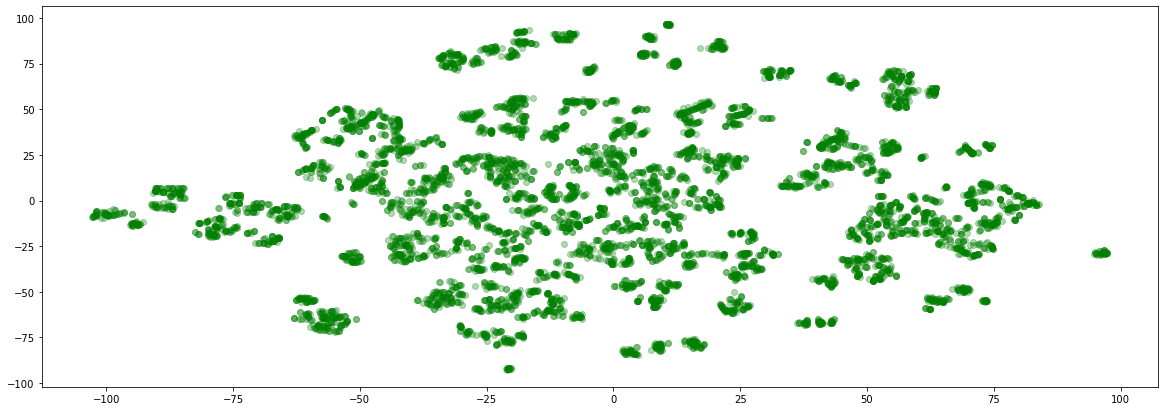

In [1095]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], color = 'green', alpha = 0.3)

In [1096]:
from sklearn.cluster import KMeans

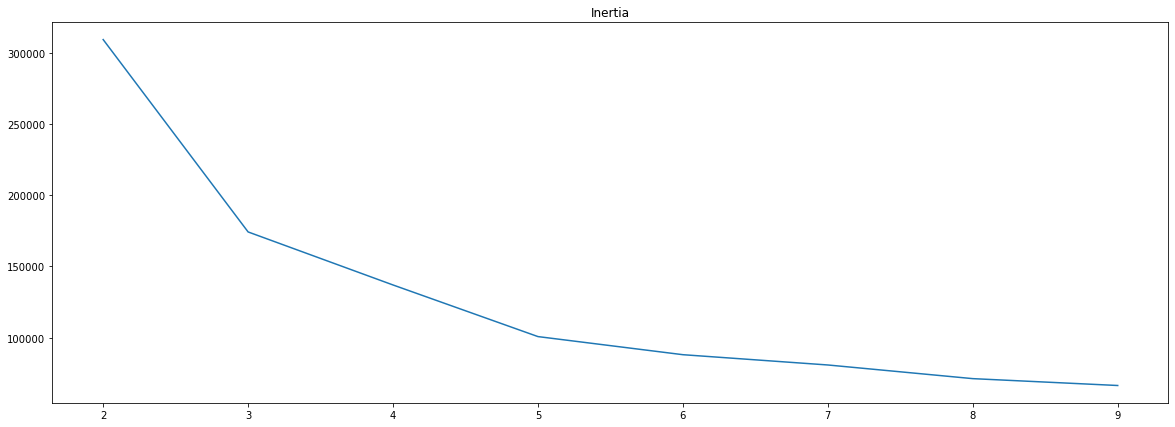

In [1097]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(x_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia')

plt.show()

In [1098]:
train_labels = []
valid_labels = []
for i in [3, 5, 9]:
    km_model = KMeans(n_clusters=i, random_state=100)
    train_labels.append(km_model.fit_predict(x_train_scaled))
    valid_labels.append(km_model.predict(x_valid_scaled))

In [1099]:
train_labels_3 = train_labels[0]
train_labels_5 = train_labels[1]
train_labels_9 = train_labels[2]

In [1100]:
valid_labels_3 = valid_labels[0]
valid_labels_5 = valid_labels[1]
valid_labels_9 = valid_labels[2]

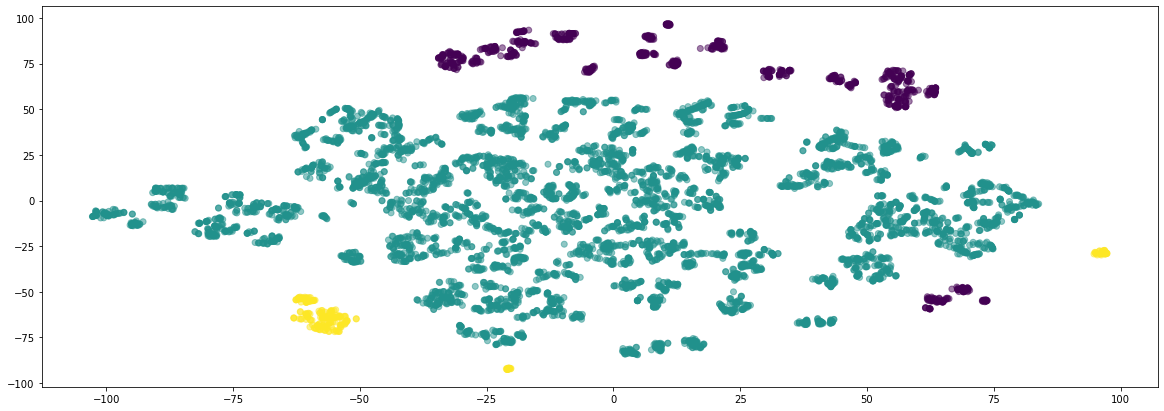

In [1101]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels_3, alpha = 0.5)

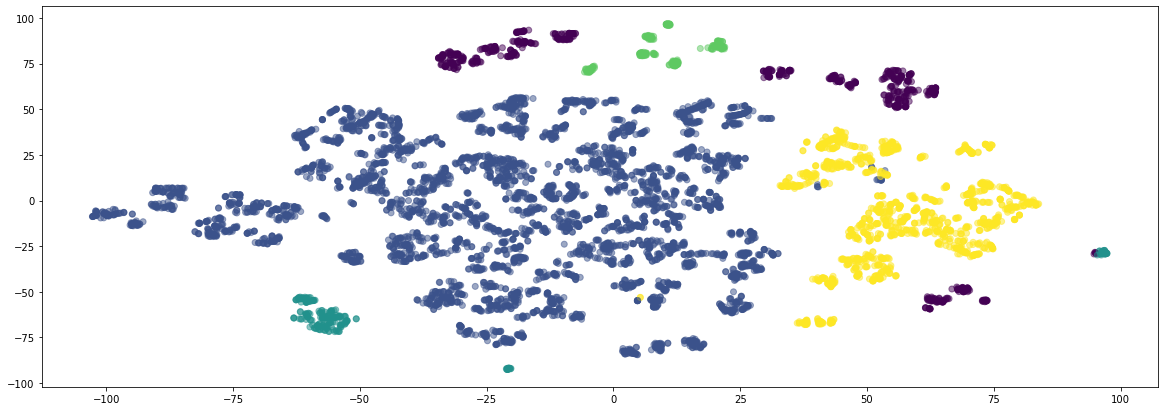

In [1102]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels_5, alpha = 0.5)

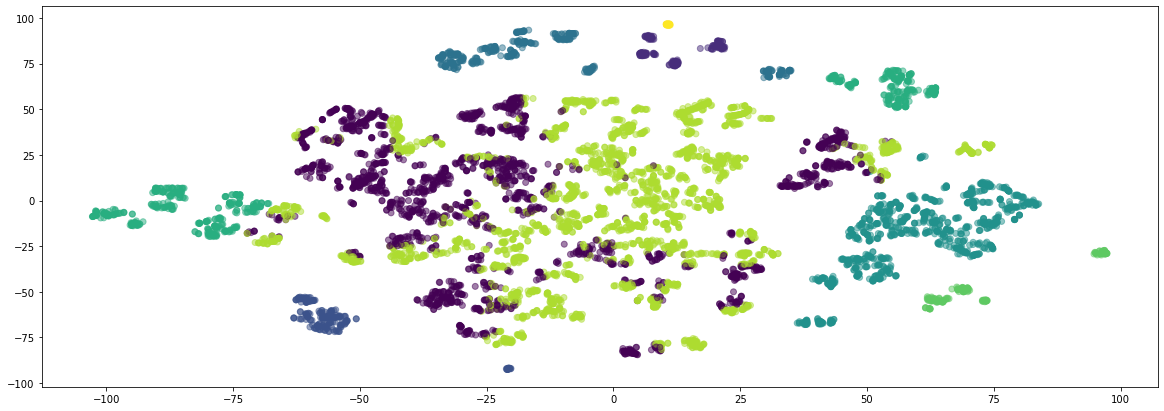

In [1103]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_labels_9, alpha = 0.5)

In [1104]:
x_train['labels_3'], x_train['labels_5'], x_train['labels_9'] = train_labels_3, train_labels_5, train_labels_9

In [1105]:
x_valid['labels_3'], x_valid['labels_5'], x_valid['labels_9'] = valid_labels_3, valid_labels_5, valid_labels_9

Добавим в датасет 2 компоненты, полученные при понижении размерности PCA

In [1106]:
from sklearn.decomposition import PCA

In [1107]:
pca = PCA(n_components=2, random_state=100)

In [1108]:
components_train = pca.fit_transform(x_train_scaled)

In [1109]:
components_valid = pca.transform(x_valid_scaled)

In [1110]:
x_train[['comp1', 'comp2']] = components_train

In [1111]:
x_valid[['comp1', 'comp2']] = components_valid

## RandomForestRegressor

Используем для обучения модель RandomForestRegressor с параметрами (random_state = 100, max_depth = 9, max_features = 9, n_estimators = 400)

In [1112]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [1113]:
#parameters = [{'n_estimators': [10, 15, 50, 100, 200, 400], 'max_features': np.arange(3, 10), 'max_depth': np.arange(4, 10)}]

In [1114]:
#clf = GridSearchCV(estimator=RandomForestRegressor(random_state=100), param_grid=parameters, scoring= 'r2', cv=3)

In [1115]:
#clf.fit(x_train, y_train)

In [1116]:
#clf.best_params_

In [1117]:
rfr_model = RandomForestRegressor(random_state = 100, max_depth = 9, max_features = 9, n_estimators = 400)

In [1118]:
rfr_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, max_features=9, n_estimators=400,
                      random_state=100)

In [1119]:
y_valid_pred = rfr_model.predict(x_valid)

In [1120]:
r2_score(y_valid, y_valid_pred)

0.747480812103166

In [1121]:
y_train_pred = rfr_model.predict(x_train)

In [1122]:
r2_score(y_train, y_train_pred)

0.8243722134473359

In [1123]:
from sklearn.model_selection import cross_val_score, KFold

In [1124]:
cv_score = cross_val_score(rfr_model, x_train, y_train, scoring='r2', cv=KFold(n_splits=4, shuffle = True, random_state=100))
cv_score

array([0.70470034, 0.72293324, 0.73701351, 0.67329366])

In [1125]:
cv_score.mean()

0.7094851877856287

## Функция для редактирования тестовых данных с целью приведения их к сопоставимым с моделью

In [1126]:
def transform_test(test, median_ls_s):
    test['Healthcare_1'].fillna(median_healthcare_1, inplace = True)
    test['LifeSquare'].fillna(test['Square']*median_ls_s, inplace = True)
    test['HouseFloor'] = test['HouseFloor'].astype(int)
    test['Rooms'] = test['Rooms'].astype(int)
    test.drop('Social_1', axis = 1, inplace = True)
    for el in ['A', 'B']:
        for column in ['Ecology_2', 'Ecology_3', 'Shops_2']:
            test.loc[test[column]==el, column] = f'{column}_{el}'
    test = pd.concat([test, pd.get_dummies(test['Ecology_2']), pd.get_dummies(test['Ecology_3']), pd.get_dummies(test['Shops_2'])], axis=1)
    x_test = test[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor','HouseFloor', 'HouseYear', 'Ecology_1','Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1','Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A','Shops_2_B']]
    return x_test, test

In [1127]:
test = pd.read_csv('test.csv')

In [1128]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

In [1129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

## Редактирование тестовых данных для прогнозирования

In [1130]:
x_test, test  = transform_test(test, median_ls_s)

In [1131]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   int64  
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   int64  
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Social_2       5000 non-null   int64  
 10  Social_3       5000 non-null   int64  
 11  Healthcare_1   5000 non-null   float64
 12  Helthcare_2    5000 non-null   int64  
 13  Shops_1        5000 non-null   int64  
 14  Ecology_2_A    5000 non-null   uint8  
 15  Ecology_2_B    5000 non-null   uint8  
 16  Ecology_3_A    5000 non-null   uint8  
 17  Ecology_3_B    5000 non-null   uint8  
 18  Shops_2_

In [1132]:
x_test['HouseYear'].unique()

array([1972, 1977, 1909, 2007, 2017, 1997, 2014, 1981, 1971, 1968, 1974,
       1959, 1976, 2015, 2004, 2000, 1970, 1964, 1975, 1988, 1963, 1987,
       1933, 1962, 1969, 1984, 1980, 1929, 1990, 1960, 2016, 1954, 1996,
       2019, 1993, 1911, 1985, 1982, 1966, 1978, 2003, 1983, 1973, 2018,
       2013, 2010, 1957, 1958, 1965, 2008, 1986, 1979, 2012, 1995, 1999,
       1989, 1992, 2009, 1956, 2005, 1998, 1940, 2002, 1991, 1967, 1994,
       2020, 1955, 1961, 2006, 2011, 1926, 2001, 1934, 1917, 1931, 1953,
       1943, 1941, 1930, 1912, 1935, 1927, 1937, 1918, 1950, 1952, 1910,
       1939, 1914, 1908, 1938, 1928, 1932, 1948, 1949, 1920])

In [1133]:
x_test['Rooms'].unique()

array([ 2,  1,  3,  4,  5,  6,  0, 17])

In [1134]:
x_test[x_test['Rooms'] == 17]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
3398         111     17  52.866107   32.528342            8.0     15   

      HouseFloor  HouseYear  Ecology_1  Social_2  Social_3  Healthcare_1  \
3398          17       1987   0.093443      4635         5        3300.0   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
3398            2        4            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B  
3398            1          0          1

In [1135]:
x_test.loc[x_test['Rooms'] == 17, 'Rooms'] = 2

In [1136]:
x_test['Rooms'].unique()

array([2, 1, 3, 4, 5, 6, 0])

In [1137]:
x_test[x_test['Rooms'] == 0]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
2406          58      0  116.824201  113.692424            0.0      3   
2524          27      0   76.345154   42.820796           12.0     14   

      HouseFloor  HouseYear  Ecology_1  Social_2  Social_3  Healthcare_1  \
2406           3       1977   0.437885      5735         3        1084.0   
2524           0       1977   0.017647       469         0         900.0   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
2406            0        5            0            1            0   
2524            0        0            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B  
2406            1          0          1  
2524            1          0          1

In [1138]:
x_test.loc[(x_test['Rooms'] == 0)&(x_test['KitchenSquare'] == 0), 'Rooms'] = 5

In [1139]:
x_test.loc[(x_test['Rooms'] == 0)&(x_test['HouseFloor'] == 0), 'Rooms'] = 3

In [1140]:
x_test.loc[(x_test['KitchenSquare'] == 0)|(x_test['KitchenSquare'] == 1), 'KitchenSquare'] = x_test['Square']*median_ks_s

In [1141]:
x_test.loc[x_test['HouseFloor'] == 0, 'HouseFloor'] = x_test['Floor']

In [1142]:
x_test.loc[x_test['HouseFloor']<x_test['Floor']]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1             74      2   69.263183   42.943174       8.311582      6   
10            61      3   64.543658   42.651541       7.000000     10   
14            27      1   37.555197   23.284222       4.506624      5   
27            58      1   48.610661   48.752502       5.833279      4   
36           205      1   37.480811   16.851795       8.000000      6   
...          ...    ...         ...         ...            ...    ...   
4968          27      4  104.664209   66.903563      12.559705      4   
4972          30      1   38.376234   37.003311       4.605148      2   
4989          39      2   44.203592   30.191691       6.000000     10   
4993         113      2   46.627882   27.058739       5.000000      6   
4997          12      3   77.842178   48.282625       9.000000     23   

      HouseFloor  HouseYear  Ecology_1  Social_2  Social_3  Healthcare_1  \
1              1       1977   0.075779      1437         3         900.0   
10             9       1981   0.300323     10311         6         900.0   
14             1       1977   0.211401      1892         0         900.0   
27             3       1977   0.437885      5735         3        1084.0   
36             5       1933   0.169091      3856        10         900.0   
...          ...        ...        ...       ...       ...           ...   
4968           1       2016   0.017647       469         0         900.0   
4972           1       1977   0.000078      6398       141        1046.0   
4989           9       1972   0.428826      5011         8         730.0   
4993           5       1969   0.307467      5048         9         325.0   
4997          22       1989   0.090799     19083         2         900.0   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
1               0        2            0            1            0   
10              1        9            0            1            0   
14              0        1            0            1            0   
27              0        5            0            1            0   
36              2        5            0            1            0   
...           ...      ...          ...          ...          ...   
4968            0        0            0            1            0   
4972            3       23            0            1            0   
4989            0        2            0            1            0   
4993            2        5            0            1            1   
4997            5       15            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B  
1               1          0          1  
10              1          0          1  
14              1          0          1  
27              1          0          1  
36              1          0          1  
...           ...        ...        ...  
4968            1          0          1  
4972            1          0          1  
4989            1          0          1  
4993            0          0          1  
4997            1          0          1  

[753 rows x 20 columns]

In [1143]:
x_test['HouseFloor_new'] = x_test['Floor']

In [1144]:
x_test['Floor_New'] = x_test['HouseFloor']

In [1145]:
x_test.loc[x_test['HouseFloor']-x_test['Floor']<0, 'HouseFloor'] = x_test['HouseFloor_new']

In [1146]:
x_test.loc[x_test['HouseFloor']-x_test['Floor']<0, 'Floor'] = x_test['Floor_New']

In [1147]:
x_test[x_test['HouseFloor']-x_test['Floor']<0]['Floor'].count()

0

In [1148]:
x_test.drop(labels = ['HouseFloor_new'], axis = 1, inplace = True)

In [1149]:
x_test.drop(labels = ['Floor_New'], axis = 1, inplace = True)

In [1150]:
x_test.loc[x_test['KitchenSquare']/x_test['Square']>0.7, 'KitchenSquare'] = x_test['Square']*median_ks_s

In [1151]:
x_test.loc[x_test['KitchenSquare'] == x_test['LifeSquare'], 'KitchenSquare'] = x_test['Square']*median_ks_s

In [1152]:
x_test.loc[x_test['KitchenSquare']/x_test['Square']>0.6, 'KitchenSquare'] = x_test['Square']*median_ks_s

In [1153]:
x_test.loc[x_test['KitchenSquare']/x_test['Square']<0.0225]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1499         124      4  189.679576  114.708673            4.0     19   
3909          76      3  221.138768  118.055342            4.0     32   

      HouseFloor  HouseYear  Ecology_1  Social_2  Social_3  Healthcare_1  \
1499          40       2013   0.174739      3379         9         100.0   
3909          48       2011   0.000000      1660        39        1786.0   

      Helthcare_2  Shops_1  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
1499            0        3            0            1            0   
3909            1        5            0            1            0   

      Ecology_3_B  Shops_2_A  Shops_2_B  
1499            1          0          1  
3909            1          0          1

In [1154]:
x_test.loc[x_test['LifeSquare']/x_test['Square']>0.9, 'LifeSquare'] = x_test['Square']*median_ls_s

In [1155]:
x_test.loc[x_test['LifeSquare']/x_test['Square']<0.347, 'LifeSquare'] = x_test['Square']*median_ls_s

In [1156]:
x_test_scaled = scaler.transform(x_test)

In [1157]:
test_labels = []
for i in [3, 5, 9]:
    km_model = KMeans(n_clusters=i, random_state=100)
    km_model.fit(x_train_scaled)
    test_labels.append(km_model.predict(x_test_scaled))

In [1158]:
test_labels_3 = test_labels[0]
test_labels_5 = test_labels[1]
test_labels_9 = test_labels[2]

In [1159]:
x_test['labels_3'], x_test['labels_5'], x_test['labels_9'] = test_labels_3, test_labels_5, test_labels_9

In [1160]:
components_test = pca.transform(x_test_scaled)

In [1161]:
x_test[['comp1', 'comp2']] = components_test

## Прогнозирование цен с помощью модели RandomForestRegression (она показала самый хороший результат)

In [1162]:
rfr_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, max_features=9, n_estimators=400,
                      random_state=100)

In [1163]:
y_test_pred = pd.DataFrame(rfr_model.predict(x_test), columns = ['Price'])

In [1164]:
submit = pd.concat([test['Id'], y_test_pred], axis = 1)

In [1165]:
submit

Id          Price
0       725  177629.184932
1     15856  224940.900015
2      5480  228675.873726
3     15664  332844.395863
4     14275  138896.278945
...     ...            ...
4995   8180  250163.242208
4996   4695  129915.329253
4997   5783  332350.097544
4998   4780  205006.630411
4999  12504  172879.246678

[5000 rows x 2 columns]

In [1166]:
submit.to_csv('ELapina_predictions.csv', index=False)